<h1> TP1 </h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

<h1> Simulation of Brownian Motion (BM)</h1>

Consider a uniform partition / grid 

$$0=t_0<t_1<\ldots<t_N=T$$

of $[0,T]$, where $t_k=k\Delta t$, $k=0,\ldots,N$ and $\Delta t=\frac{T}{N}$.

To simulate Brownian motion over this grid $W_{t_k}$, $k=0,\ldots,N$, simulate $N$ independent increments $dW_{t_i}=W_{t_{i+1}}-W_{t_i}$, $i=0,\ldots,N-1$, with distribution $\sqrt{\Delta t}\mathcal N(0,1)$ and observe that $W_0=0$ and for $k=1,\ldots,N$

$$W_{t_k}=\sum_{i=0}^{k-1}(W_{t_{i+1}}-W_{t_i}).$$

In other words $W$ is the cumulative sum of its increments.

In [3]:
def sim_W(T,N):
    # function to simulate BM on [0,T] with a partition of size dt=T/N
    
    dt = T/N # size of the intervals in the partition    
    times = dt*np.arange(0,N+1) # grid of times t_0,...,t_N   
    dW = np.sqrt(dt)*np.random.randn(N) # dW is a vector containing the ind. increments over the grid   
    W = np.cumsum(dW) # cumulative sum: W = [dW[0], dW[0]+dW[1], dW[0]+dW[1]+dW[2], ..., dW[0]+...+dW[N-1]]  
    W = np.insert(W, 0, 0) # include zero; we want W[0] = 0
    
    return [times,W]  

<h2><span style='color:green'>Question 1</span></h2>

Use the function sim_W, with $N=1000$, to simulate Brownian motion on $[0,1]$, and plot the trajectory that you obtain.

In [6]:
# Use this cell for Q1
sim_W(1,1000)

[array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([ 0.        ,  0.0027981 ,  0.05685887, ..., -0.17936641,
        -0.20770637, -0.20737744])]

<h1> Simulation of Geometric Brownian motion (GBM) </h1>

Recall that in the Black-Scholes-Merton model, prices of the risky asset are given by a Geometric Brownian Motion (GBM)

$$ S_t = S_0\exp\left(\left(\alpha -\frac{\sigma^2}{2}\right)t+\sigma W_t\right).$$

<h2><span style='color:green'>Question 2</span></h2>

Use the explicit expression of GBM to complete the code below.

In [8]:
def sim_GBM(T,N,S0,alpha,vol):
    # function to simulate GBM S_{t_k} over the grid of points t_k=k*Delta t, k=0,...,N 
    
    [times,W] = sim_W(T,N) # construct grid and simulate Brownian motion over the grid
    
    S =  S0*np.exp((alpha-(vol**2)/2)*times+vol*W) # Use the explicit expression of GBM in terms of t and W_t to complete this line 
    
    return [times,S]

<h2><span style='color:green'>Question 3</span></h2>

Use the function sim_GBM, with $N=1000$, to simulate Geometric Brownian motion on $[0,10]$. Suppose that the initial price is $S_0=100$, the mean rate of return $\alpha=0.01$ and the volatility is $\sigma=0.2$.

In [10]:
# Use this cell for Q3
sim_GBM(10,1000,100,0.01,0.2)

[array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]),
 array([100.        ,  99.54187717,  97.9659415 , ..., 134.88946578,
        137.63523197, 139.19116133])]

<h1>The Black-Scholes-Merton formula</h1>

Recall that the price of a European call option with strike $K$ and maturity $T$ is

$$v_{call}(t,S) = S\Phi(d_1)-K{\rm e}^{-r \tau}\Phi(d_2),$$

where $\tau=T-t$ is time to maturity,  $\Phi$ is the cumulative distribution function of the standard normal distribution and

$$d_1=\frac{1}{\sigma\sqrt{\tau}}\left\{\ln\left(\frac{{ S}}{{ K}}\right)+\left(r+\frac{\sigma^2}{2}\right){\tau}\right\},$$

$$d_2=d_1-\sigma\sqrt{\tau}.$$

For a put option the formula is

$$v_{put}(t,S) = K{\rm e}^{-r \tau}\Phi(-d_2)-S\Phi(-d_1).$$

You can find below the implementation of the call and put prices.

In [11]:
def bs_call_price(vol, S, K, tau, r):
    # Black-Scholes-Merton formula for a call
    
    d1 = ((np.log(S/K) + (r + vol ** 2 / 2) * tau) / (np.sqrt(vol ** 2 * tau)))
    d2 = d1 - np.sqrt(vol**2 * tau)
    C = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2) 
    
    return C

In [12]:
def bs_put_price(vol, S, K, tau, r):
    # Black-Scholes-Merton formula for a put
    
    d1 = ((np.log(S/K) + (r + vol ** 2 / 2) * tau) / (np.sqrt(vol ** 2 * tau)))
    d2 = d1 - np.sqrt(vol**2 * tau)
    P =  K * np.exp(-r * tau) * norm.cdf(-d2)-S * norm.cdf(-d1) 
    
    return P

<h2><span style='color:green'>Question 4</span></h2>

Using the functions bs_call_price and bs_put_price reproduce the plot in Slide 24 of the lecture. To this end price the options over a grid of 100 initial prices $S_0$ going from $S_0=60$ to $S_0=140$.

In [15]:
K = 100
tau = 1
r = 0.02
S0 = np.linspace(60, 140, 100)
sigma = 0.2


Text(0.5, 1.0, 'call')

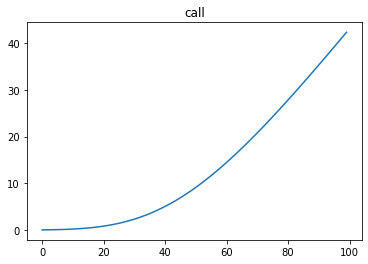

In [28]:
# Use this cell for Q4
call=bs_call_price(sigma,S0,K,tau,r)
put=bs_put_price(sigma,S0,K,tau,r)

plt.plot( call)
plt.title("call")

Text(0.5, 1.0, 'put')

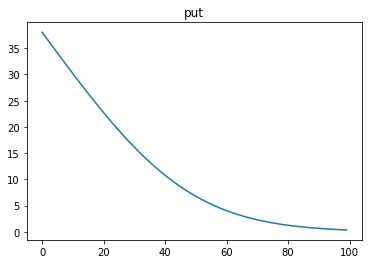

In [29]:
plt.plot( put)
plt.title("put")

<h1> The Black-Scholes-Merton delta for a call </h1>

Recall that for a call option the delta of the option is
    $$\frac{\partial v_{call}(t,S)}{\partial S}=\Phi(d_1)$$

<h2><span style='color:green'>Question 5</span></h2>

Complete the code below for the function that calculates the call delta.

In [30]:
def bs_call_delta(vol, S, K, tau, r):
    # Delta for a call
    d1 = ((np.log(S/K) + (r + vol ** 2 / 2) * tau) / (np.sqrt(vol ** 2 * tau)))    
    # Complete this line of the code
    
    return norm.cdf(d1)

<h1> Simulation of wealth process of a delta-hedging strategy for a call</h1>


$$ dX_t = r(X_t-\delta_t S_t)dt+\delta_t dS_t $$

<h3>Idea</h3> Do it over a grid of points $t_k$, starting from $X_0=$ price of the option at time 0, 

$$ X_{t_{k+1}}=X_{t_{k}}+r(X_{t_k}-\delta_{t_k} S_{t_k})\Delta t+\delta_{t_k} (S_{t_{k+1}}-S_{t_k}) $$

<h2><span style='color:green'>Question 6</span></h2>

Complete the code below to simulate the wealth process of a call delta-hedging strategy.

In [31]:
def sim_S_X(T,N,S0,alpha,r,vol,K):
    # function to simulate the trajectories of the price and the wealth of the delta hedging strategy
    # over a finite grid of points t_0=0,t_1,...,t_N=T with interval size dt=T/N
    
    dt = T/N # interval size
    [times,S] = sim_GBM(T,N,S0,alpha,vol) # simulation of the price trajectory
    
    tau = T-times[0:N]
    
    delta = bs_call_delta(vol, S[0:N], K, tau, r)
    
    X = np.zeros(N+1) # this is the vector that will contain the wealth simulations over the grid
    
    X[0] = bs_call_price(vol, S0, K, T, r) # we start from the initial wealth = BSM price
    
    for i in range(N):
        X[i+1] =X[i]+r*(X[i]-delta[i]*S[i])*(times[i+1]-times[i])+delta[i]*(S[i+1]-S[i]) # complete this line using the scheme to simulate X described above
        
    return [times,S,X]

<h2><span style='color:green'>Question 7</span></h2>

Consider the following parameters. 

$$N=100,\quad T=1,\quad K=100,\quad r=0.01,\quad S_0=100,\quad\alpha=0.03,\quad\sigma=0.1.$$

Using the functions sim_S_X and bs_call_price in order to plot in the same plot: 
- one simulated trajectory for the wealth
- The real option prices over the times in the grid

What do you observe?


In [33]:

sim_S_X(1,100,100,0.03,0.01,0.1,100)

[array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([100.        , 100.26268559, 102.10427225, 103.81468567,
        104.12463577, 104.73944053, 105.22413584, 105.76285959,
        102.29651488, 101.79783911, 102.66809938, 102.79272247,
        103.07685946, 103.73812033, 103.08876591, 106.09001781,
        105.2722981 , 106.24506897, 106.21121284, 104.97

<h2><span style='color:green'>Question 8</span></h2>

We call the lazy strategy the following strategy of the seller of a call option: no hedging is done by the seller, he/she just invests $X_0$ (i.e. the premium of the option) in the money market account. 

The P\&L from the lazy strategy, taking into account the short position on the call option, is

$$X_0{\rm e}^{rT}-(S_T-K)_+$$

We want to evaluate the performance of this strategy vs. the delta-hedging.

To this end, complete the code below and simulate 1000 trajectories of prices and wealths of delta-hedging strategies using sim_S_X.

For each simulation calculate the following two P\&L's:

- $PL1$ = final wealth of the delta hedging strategy - payoff of the option;
- $PL2$ = final wealth of the lazy strategy - payoff of the option.

Display in two different histograms the values of $PL1$ and $PL2$ obtained. What do you observe? 


In [ ]:
M=1000 # number of runs

PL1 = np.zeros(M)
PL2 = np.zeros(M)

for j in range(M):
    [times,S,X] = sim_S_X(T,N,S0,alpha,r,vol,K)
    PL1[j] = # complete this line
    PL2[j] = # complete this line

In [ ]:
# Plot the histograms

fig, axs = plt.subplots(1, 2,sharey=True, tight_layout=True,figsize=(15,5))

axs[0].hist(PL1, bins=20)
axs[1].hist(PL2, bins=20)

plt.show()